In [17]:
q1_seq1='FDCAEYRSTNIYGYGLYEVSMKPAKNTGIVSSFFTYTGPAHGTQWEIDIEFLGKDTTKVQFNYYTNGVGGHEKVISLGFDASKGFHTYAFDWQPGYIKWYVDGVLK'
q1_seq2='KASEDLVKKHAGVLGAILKKKGHHEAELKPLAQSHATKAHKNIFISEAIIHVLHSRHPGDFGADAQGAMNKALELFRKDIAAKYKELGY'
q1_seq3 = 'TVEGAGSIAAATGFVKKDQLGKNEEGAPQEGILEDMPVDPDNEAYEMPSEEGYQDYEPEA'
q2_seq1="ALLSFERKYRVRGGTLIGGDLFDFWVGPYFVGFFGVSAIFFIFLGVSLIGYAASQGPTWDPFAISINPPDLKYGLGAAPLLEGGFWQAITVCALGAFISWMLREVEISRKLGIGWHVPLAFCVPIFMFCVLQVFRPLLLGSWGHAFPYGILSHLDWVNNFGYQYLNWHYNPGHMSSVSFLFVNAMALGLHGGLILSVANPGDGDKVKTAEHENQYFRDVVGYSIGALSIHRLGLFLASNIFLTGAFGTIASGPFWTRGWPEWWGWWLDIPFWS"


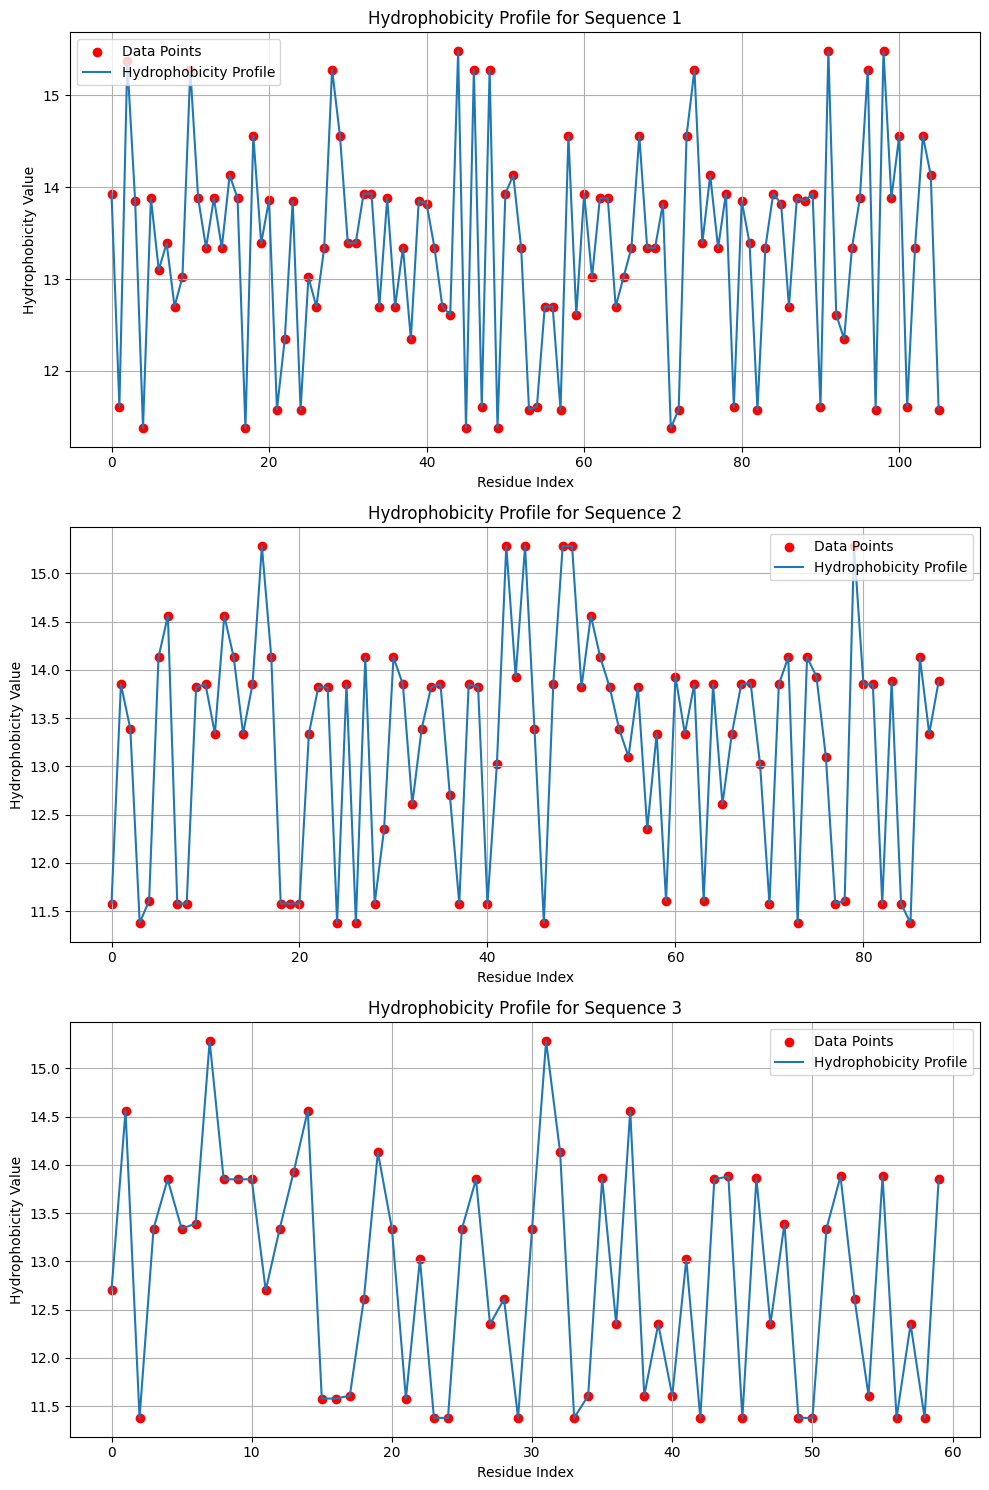

In [42]:
#BT3040 | Assignment 8 | Q1 |Atharva Mandar Phatak | BE21B009 
import matplotlib.pyplot as plt

# hydrophobicity values dictionary
hydrophobicity_values = {
    'A': 13.85, 'D': 11.61, 'C': 15.37, 'E': 11.38, 'F': 13.93,
    'G': 13.34, 'H': 13.82, 'I': 15.28, 'K': 11.58, 'L': 14.13,
    'M': 13.86, 'N': 13.02, 'P': 12.35, 'Q': 12.61, 'R': 13.10,
    'S': 13.39, 'T': 12.70, 'V': 14.56, 'W': 15.48, 'Y': 13.88
}

# Function to calculate hydrophobicity values for a sequence
def calculate_hydrophobicity(sequence):
    return [hydrophobicity_values[residue] for residue in sequence]

# List of sequences
sequences = [q1_seq1,q1_seq2,q1_seq3]

# Create subplots for each sequence
fig, axs = plt.subplots(len(sequences), 1, figsize=(10, 5 * len(sequences)))

# Plot each sequence
for i, seq in enumerate(sequences):
    seq_val = calculate_hydrophobicity(seq)
    sequence = [i for i in seq]
    values = seq_val
    
    # Scatter plot
    axs[i].scatter(range(len(sequence)), values, marker='o', label='Data Points',c='red')

    # Line plot
    axs[i].plot(range(len(sequence)), values ,label="Hydrophobicity Profile")

    # Customize subplot
    axs[i].set_title('Hydrophobicity Profile for Sequence {}'.format(i+1))
    axs[i].set_xlabel('Residue Index')
    axs[i].set_ylabel('Hydrophobicity Value')
    axs[i].grid(True)
    axs[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [60]:
#BT3040 | Assignment 8 | Q2 |Atharva Mandar Phatak | BE21B009 

x1=[i for i in q1_seq1]
y1=calculate_hydrophobicity(q1_seq1)

x2=[i for i in q1_seq2]
y2=calculate_hydrophobicity(q1_seq2)

x3=[i for i in q1_seq3]
y3=calculate_hydrophobicity(q1_seq3)

def amphicity(x, y, A=None, B=None):
    # Beta sheet
    if B:
        for i in B:
            s, e = i
            ad1 = [sum(y[i] for i in range(s, e + 1) if i % 2 == 0)]
            ad2 = [sum(y[i] for i in range(s, e + 1) if i % 2 != 0)]
            re = abs((ad1[0] / 3) - (ad2[0] / 3))
            print(f"Beta sheet {i}: {re:.2f}")

    # Alpha helix
    if A:
        for i in A:
            s, e = i
            ad1 = [sum(y[i] for i in range(s, e + 1) if i % 4 == 0 or i % 4 == 1)]
            ad2 = [sum(y[i] for i in range(s, e + 1) if i % 4 == 2 or i % 4 == 3)]
            re = abs((ad1[0] / 4) - (ad2[0] / 4))
            print(f"Alpha helix {i}: {re:.2f}")


# seq1
A_1 = [(27, 35)]
B_1 = [(0, 5), (44, 49)]
# seq2 :
A_2 = [(1, 8), (9, 16), (32, 39), (51, 58)]
B_2 = [(40, 45), (82, 87)]
# seq3 :
A_3 = [(3, 10), (11, 18), (19, 26)]
B_3 = [(28, 33), (40, 45)]

print("For seq 1:")
amphicity(x1, y1, A_1, B_1)
print("\nFor seq 2:")
amphicity(x2, y2, A_2, B_2)
print("\nFor seq 3:")
amphicity(x3, y3, A_3, B_3)


For seq 1:
Beta sheet (0, 5): 0.45
Beta sheet (44, 49): 3.89
Alpha helix (27, 35): 2.25

For seq 2:
Beta sheet (40, 45): 0.60
Beta sheet (82, 87): 0.44
Alpha helix (1, 8): 0.06
Alpha helix (9, 16): 0.85
Alpha helix (32, 39): 1.27
Alpha helix (51, 58): 0.07

For seq 3:
Beta sheet (28, 33): 0.68
Beta sheet (40, 45): 0.46
Alpha helix (3, 10): 0.24
Alpha helix (11, 18): 0.25
Alpha helix (19, 26): 0.69


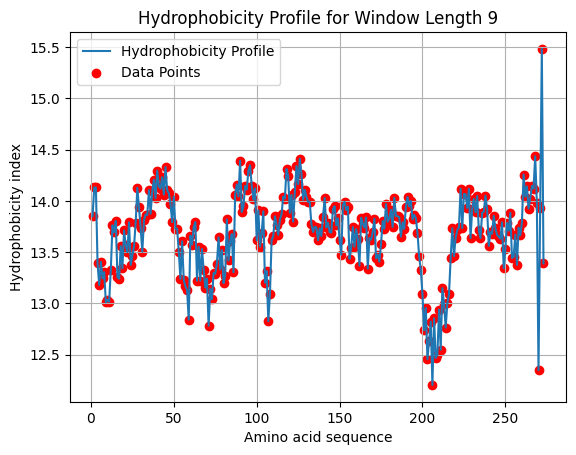

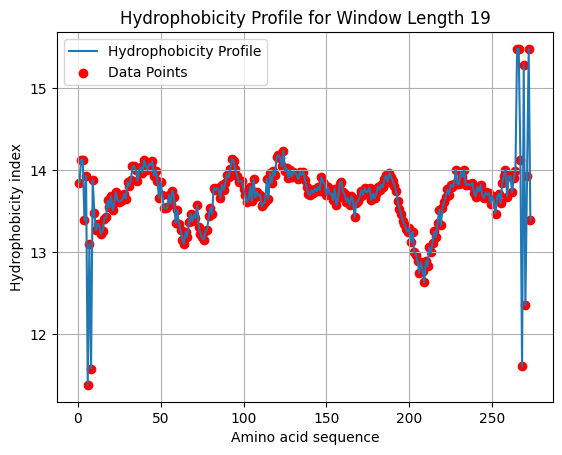

In [43]:
#BT3040 | Assignment 8 | Q3 |Atharva Mandar Phatak | BE21B009 

import matplotlib.pyplot as plt

def my_h_r_plot(seq, w, wid_len):
    # Create x-axis values
    x = [i for i in range(1, len(seq) + 1)]
    # Create y-axis values
    y = [hydrophobicity_values[i] for i in seq]
x
    # Calculate moving average for hydrophobicity values
    yn = []
    for i in range(w):
        yn.append(y[i])
    for i in range(w, len(seq) - w):
        p = (sum(y[i - w:i]) + sum(y[i + 1:i + w + 1])) / (2 * w)
        yn.append(p)
    for i in range(len(seq) - w, len(seq)):
        yn.append(y[i])

    # Plot the hydrophobicity profile
    plt.figure()
    plt.plot(x, yn, label="Hydrophobicity Profile")
    plt.scatter(x, yn, c="red", label="Data Points")
    plt.grid(True)

    # Set axis labels and title
    plt.xlabel('Amino acid sequence')
    plt.ylabel('Hydrophobicity index')
    plt.title(f'Hydrophobicity Profile for {wid_len}')

    # Add legend
    plt.legend()

    # Show plot
    plt.show()


# Plot hydrophobicity profile with window length 4 and 9
my_h_r_plot(q2_seq1, 4, 'Window Length 9')
my_h_r_plot(q2_seq1, 9, 'Window Length 19')


In [61]:
#BT3040 | Assignment 8 | Q5 |Atharva Mandar Phatak | BE21B009 
import regex as re

pattern1 = "[SV]T[VT][DERK]{2}[^IL]"
pattern2 = "[FILV]Q...[^RK]G...[RK]..[FILVWY]"

with open("Q4.fasta") as file1:
    sequences = [line.strip() for line in file1]

for i in range(len(sequences)):
    matches1 = re.finditer(pattern1, sequences[i])
    matches2 = re.finditer(pattern2, sequences[i])
    
    for match in matches1:
        start_pos = match.start()
        end_pos = match.end()
        print(f"Pattern 1 matched at position {start_pos + 1} to {end_pos} in:")
        print(sequences[i-1])
        print(sequences[i])
        print()

    for match in matches2:
        start_pos = match.start()
        end_pos = match.end()
        print(f"Pattern 2 matched at position {start_pos + 1} to {end_pos} in:")
        print(sequences[i-1])
        print(sequences[i])
        print()


Pattern 1 matched at position 665 to 670 in:
>4A0C_2|Chains C,E|CULLIN-4B|HOMO SAPIENS (9606)
MHHHHHHVDENLYFQGGGRGSAKKLVIKNFKDKPKLPENYTDETWQKLKEAVEAIQNSTSIKYNLEELYQAVENLCSYKISANLYKQLRQICEDHIKAQIHQFREDSLDSVLFLKKIDRCWQNHCRQMIMIRSIFLFLDRTYVLQNSMLPSIWDMGLELFRAHIISDQKVQNKTIDGILLLIERERNGEAIDRSLLRSLLSMLSDLQIYQDSFEQRFLEETNRLYAAEGQKLMQEREVPEYLHHVNKRLEEEADRLITYLDQTTQKSLIATVEKQLLGEHLTAILQKGLNNLLDENRIQDLSLLYQLFSRVRGGVQVLLQQWIEYIKAFGSTIVINPEKDKTMVQELLDFKDKVDHIIDICFLKNEKFINAMKEAFETFINKRPNKPAELIAKYVDSKLRAGNKEATDEELEKMLDKIMIIFRFIYGKDVFEAFYKKDLAKRLLVGKSASVDAEKSMLSKLKHECGAAFTSKLEGMFKDMELSKDIMIQFKQYMQNQNVPGNIELTVNILTMGYWPTYVPMEVHLPPEMVKLQEIFKTFYLGKHSGRKLQWQSTLGHCVLKAEFKEGKKELQVSLFQTLVLLMFNEGEEFSLEEIKQATGIEDGELRRTLQSLACGKARVLAKNPKGKDIEDGDKFICNDDFKHKLFRIKINQIQMKETVEEQASTTERVFQDRQYQIDAAIVRIMKMRKTLSHNLLVSEVYNQLKFPVKPADLKKRIESLIDRDYMERDKENPNQYNYIA

Pattern 1 matched at position 665 to 670 in:
>4A0C_2|Chains C,E|CULLIN-4B|HOMO SAPIENS (9606)
MHHHHHHVDENLYFQGGGRGSAKKLVIKNFKDKPKLPENYTDETWQKLKEAVEAIQNSTSIKYNLEELY